In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df

,summoners,result,time,champion,d_spell,f_spell,kill,deths,assist,level,kill_part,cs,ward
0,danjuan rose,Victory,38m 16s,Rakan,Ignite,Flash,0,6,23,15,68,33,18
1,danjuan rose,Victory,24m 3s,Nami,Ignite,Flash,3,3,13,12,55,17,9
2,danjuan rose,Defeat,18m 59s,Leona,Ignite,Flash,2,6,7,8,75,23,7
3,danjuan rose,Victory,18m 41s,Senna,Heal,Flash,1,0,8,10,39,50,1
4,danjuan rose,Defeat,19m 47s,Yuumi,Exhaust,Ignite,0,7,8,10,80,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,시간의 숲,Victory,35m 50s,Talon,Ignite,Flash,11,8,10,18,54,214,3
9996,시간의 숲,Defeat,27m 35s,Sylas,Teleport,Flash,10,5,5,14,71,153,0
9997,시간의 숲,Defeat,20m 33s,Renekton,Teleport,Flash,2,2,2,12,17,164,2
9998,시간의 숲,Defeat,23m 16s,Akali,Teleport,Flash,2,5,1,12,18,150,0


In [2]:
#Label의 클래스 비율 확인
ex = df['result'].value_counts()
print('Label 클래스 개수 :\n', len(ex))
print('\nLabel 클래스 비율 :\n', ex/len(df))
print('\n클래스 비율이 1:1로 비슷하므로 accuracy를 평가지표로 사용해도 괜찮을 것 같다!\n')

Label 클래스 개수 :
 4

Label 클래스 비율 :
 Victory    0.5465
Defeat     0.4474
Remake     0.0060
UNKNOWN    0.0001
Name: result, dtype: float64

클래스 비율이 1:1로 비슷하므로 accuracy를 평가지표로 사용해도 괜찮을 것 같다!



In [3]:
df.dtypes

summoners    object
result       object
time         object
champion     object
d_spell      object
f_spell      object
kill          int64
deths         int64
assist        int64
level         int64
kill_part     int64
cs            int64
ward          int64
dtype: object

In [4]:
df.isnull().sum()

summoners    0
result       0
time         0
champion     0
d_spell      0
f_spell      0
kill         0
deths        0
assist       0
level        0
kill_part    0
cs           0
ward         0
dtype: int64

In [5]:
#전처리
#결측값 확인
df.isnull().sum()

#중복값 제거
df.drop_duplicates(ignore_index= True, keep= 'first', inplace= True)
df

,summoners,result,time,champion,d_spell,f_spell,kill,deths,assist,level,kill_part,cs,ward
0,danjuan rose,Victory,38m 16s,Rakan,Ignite,Flash,0,6,23,15,68,33,18
1,danjuan rose,Victory,24m 3s,Nami,Ignite,Flash,3,3,13,12,55,17,9
2,danjuan rose,Defeat,18m 59s,Leona,Ignite,Flash,2,6,7,8,75,23,7
3,danjuan rose,Victory,18m 41s,Senna,Heal,Flash,1,0,8,10,39,50,1
4,danjuan rose,Defeat,19m 47s,Yuumi,Exhaust,Ignite,0,7,8,10,80,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,시간의 숲,Victory,35m 50s,Talon,Ignite,Flash,11,8,10,18,54,214,3
9996,시간의 숲,Defeat,27m 35s,Sylas,Teleport,Flash,10,5,5,14,71,153,0
9997,시간의 숲,Defeat,20m 33s,Renekton,Teleport,Flash,2,2,2,12,17,164,2
9998,시간의 숲,Defeat,23m 16s,Akali,Teleport,Flash,2,5,1,12,18,150,0


In [6]:
#Feature Engineering

#타겟변수 범주수 정리
df.drop(df[(df['result']=='UNKNOWN') | (df['result']=='Remake')].index, inplace = True)

#칼바람 나락 제외
df.drop(df[df['d_spell']=='Mark'].index, inplace= True)

#타겟변수 수치화
def toInt(arg):
  if arg == 'Victory':
    return 1
  elif arg == 'Defeat':
    return 0
  else:
    return arg
df['result'] = df['result'].apply(toInt)

#time칼럼 수치화
def toSec(arg):
  min = int(arg.split('m')[0])*60
  sec = int(arg.split(' ')[1].split('s')[0])
  return min+sec
df['time'] = df['time'].apply(toSec)

#인덱스 초기화
df.reset_index(drop= True, inplace= True)

#kda칼럼 생성
def kda(df):
  lst = []
  for i in df.index:
    if df['deths'][i]==0:
      lst.append(round((df['kill'][i]+df['assist'][i])*1.2, 1))
    else:
      lst.append(round((df['kill'][i]+df['assist'][i])/df['deths'][i], 1))
  df['kda'] = lst
  return df
kda(df)
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/projectdata/data2.csv', index= False)
df

,summoners,result,time,champion,d_spell,f_spell,kill,deths,assist,level,kill_part,cs,ward,kda
0,danjuan rose,1,2296,Rakan,Ignite,Flash,0,6,23,15,68,33,18,3.8
1,danjuan rose,1,1443,Nami,Ignite,Flash,3,3,13,12,55,17,9,5.3
2,danjuan rose,0,1139,Leona,Ignite,Flash,2,6,7,8,75,23,7,1.5
3,danjuan rose,1,1121,Senna,Heal,Flash,1,0,8,10,39,50,1,10.8
4,danjuan rose,0,1187,Yuumi,Exhaust,Ignite,0,7,8,10,80,3,5,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9724,시간의 숲,1,2150,Talon,Ignite,Flash,11,8,10,18,54,214,3,2.6
9725,시간의 숲,0,1655,Sylas,Teleport,Flash,10,5,5,14,71,153,0,3.0
9726,시간의 숲,0,1233,Renekton,Teleport,Flash,2,2,2,12,17,164,2,2.0
9727,시간의 숲,0,1396,Akali,Teleport,Flash,2,5,1,12,18,150,0,0.6


In [7]:
#train, test set 분리
from sklearn.model_selection import train_test_split

target = 'result'
y = df[target]
x = df.drop(target, axis= 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 2)

In [8]:
#기준모델의 정확도
from sklearn.metrics import accuracy_score

base = y_train.mode()
predict = [base] *len(y_train)
print('기준모델 정확도 :', accuracy_score(y_train, predict))

기준모델 정확도 : 0.5512609649122807


In [12]:
#GBM모델
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from category_encoders import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, classification_report, plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pipe = make_pipeline(
    OrdinalEncoder(),
    GradientBoostingClassifier(n_estimators= 500, random_state= 2)
)

dists = {
    'gradientboostingclassifier__max_depth': range(5, 15),
    'gradientboostingclassifier__learning_rate': np.arange(0.0, 1.0, 0.1)
}

#randomizedsearchCV
clf = RandomizedSearchCV(
    pipe,
    param_distributions=dists,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state= 2
)

clf.fit(x_train, y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print('최적 하이퍼파라미터 :', clf.best_params_)
print('최적 정확도 :', clf.best_score_)
print('훈련 f1-score :', f1_score(y_train, y_train_pred))
print('검증 f1-score :', f1_score(y_test, y_test_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
최적 하이퍼파라미터 : {'gradientboostingclassifier__max_depth': 6, 'gradientboostingclassifier__learning_rate': 0.2}
최적 정확도 : 0.8836348684210527
훈련 f1-score : 1.0
검증 f1-score : 0.8911185432924563


In [13]:
print('테스트셋 정확도', accuracy_score(y_test, y_test_pred))

테스트셋 정확도 0.8795725441841348


optimal_threshold : 0.5203860053854542
auc_score : 0.9492786594918602


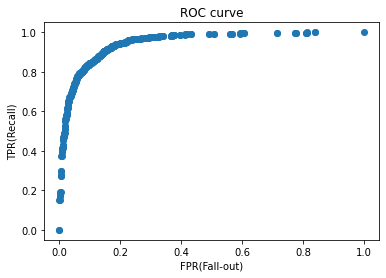

In [15]:
#GBM roc_auc curve
%matplotlib inline 
y_test_proba = clf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('optimal_threshold :', optimal_threshold)

#ROC Curve
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

#AUC Score
auc_score = roc_auc_score(y_test, y_test_proba[:, 1])
print('auc_score :', auc_score)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1108
           1       0.88      0.90      0.89      1325

    accuracy                           0.88      2433
   macro avg       0.88      0.88      0.88      2433
weighted avg       0.88      0.88      0.88      2433



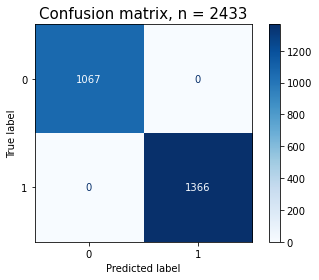

In [16]:
#GBM confusion matrix, classification report
y_test_proba = clf.predict_proba(x_test)[:,1]

print(classification_report(y_test, y_test_pred))

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(clf, x_test, y_test_pred, cmap=plt.cm.Blues, ax=ax)
plt.title(f'Confusion matrix, n = {len(y_test_pred)}', fontsize=15)
plt.show()

In [17]:
# import pickle

# with open('/content/drive/MyDrive/Colab Notebooks/projectdata/model.pkl','wb') as pickle_file:
#     pickle.dump(clf.best_estimator_, pickle_file)

In [18]:
#GBM feature importances
model3 = clf.best_estimator_.named_steps['gradientboostingclassifier']
x_test_preprocess3 = clf.best_estimator_.named_steps['ordinalencoder'].transform(x_test)
importance = pd.Series(model3.feature_importances_, x_test.columns).sort_values(ascending= False)
importance

kda          0.558452
kill_part    0.147800
time         0.067555
assist       0.040285
deths        0.037666
cs           0.032976
summoners    0.029811
kill         0.023842
champion     0.017329
level        0.016850
ward         0.012847
d_spell      0.008015
f_spell      0.006573
dtype: float64

In [21]:
#GBM Permutation Importances
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model3,
    scoring='accuracy',
    n_iter=5,
    random_state=2
)

permuter.fit(x_test_preprocess3, y_test)
feature_names = x_test.columns.tolist()
eli5.show_weights(permuter, feature_names= feature_names)

Weight,Feature
0.3392 ± 0.0117,kda
0.1070 ± 0.0116,kill_part
0.0893 ± 0.0102,assist
0.0511 ± 0.0102,time
0.0295 ± 0.0047,kill
0.0185 ± 0.0036,level
0.0127 ± 0.0031,deths
0.0022 ± 0.0017,champion
0.0002 ± 0.0037,d_spell
-0.0008 ± 0.0026,f_spell


In [25]:
#GBM
#kda
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox import pdp

x_test_preprocess_df3 = pd.DataFrame(x_test_preprocess3, columns=x_test.columns)

%matplotlib inline
isolated = pdp_isolate(
    model= model3,
    dataset= x_test_preprocess_df3,
    model_features= x_test_preprocess_df3.columns,
    feature= 'kda'
)

pdp_plot(isolated, feature_name= 'kda', plot_lines=True, plot_pts_dist=True);

ModuleNotFoundError: No module named 'pdpbox'

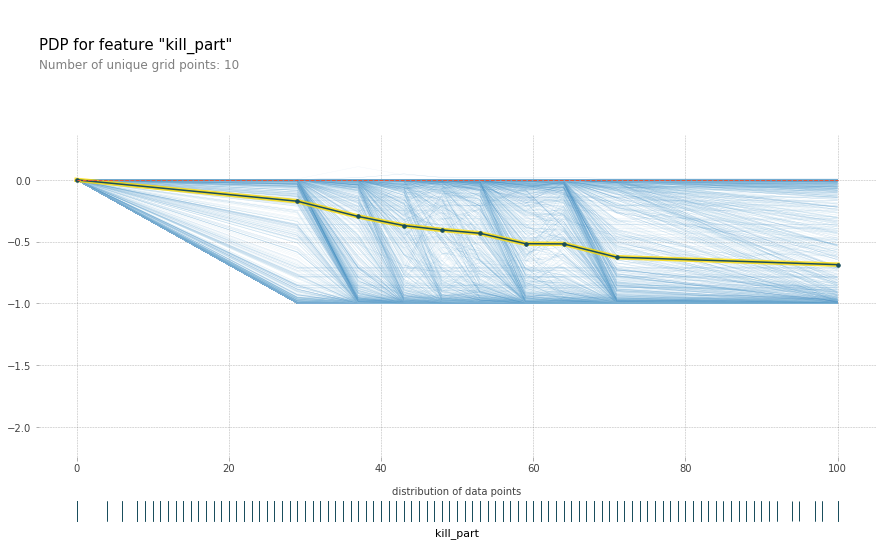

In [20]:
#kill_part
isolated = pdp_isolate(
    model= model3,
    dataset= x_test_preprocess_df3,
    model_features= x_test_preprocess_df3.columns,
    feature= 'kill_part'
)

pdp_plot(isolated, feature_name= 'kill_part', plot_lines=True, plot_pts_dist=True);

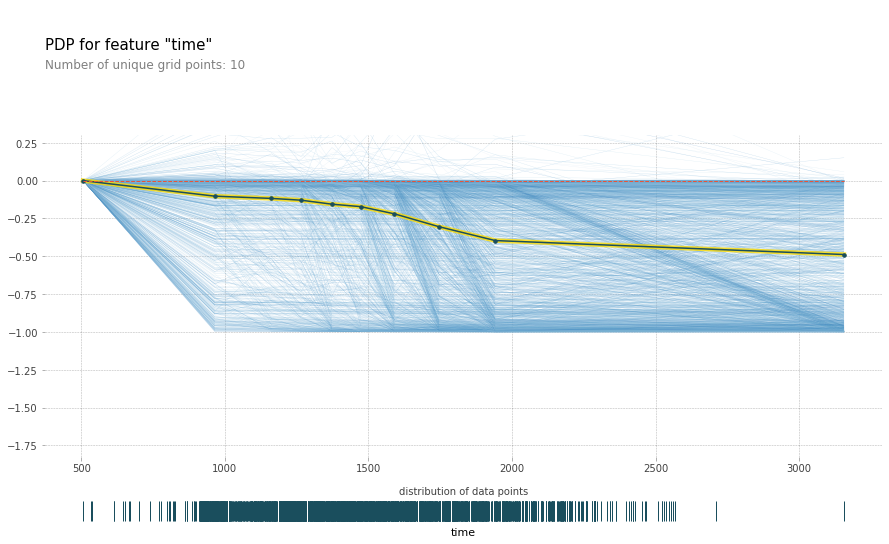

In [21]:
#time
isolated = pdp_isolate(
    model= model3,
    dataset= x_test_preprocess_df3,
    model_features= x_test_preprocess_df3.columns,
    feature= 'time'
)

pdp_plot(isolated, feature_name= 'time', plot_lines=True, plot_pts_dist=True);

In [26]:
row = x_test.iloc[[1]]
row

,summoners,time,champion,d_spell,f_spell,kill,deths,assist,level,kill_part,cs,ward,kda
925,zhonglexuruosan,925,Nocturne,Smite,Flash,1,4,1,9,40,88,3,0.5


In [27]:
row = x_test_preprocess3.iloc[[1]]
model3.predict(row)

array([0], dtype=int64)

In [30]:
import shap

explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)